In [14]:
import dill
dill.dump_session('applying_classifier_gunlaw1.db')

NotImplementedError: [E111] Pickling a token is not supported, because tokens are only views of the parent Doc and can't exist on their own. A pickled token would always have to include its Doc and Vocab, which has practically no advantage over pickling the parent Doc directly. So instead of pickling the token, pickle the Doc it belongs to.

In [3]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [10]:
anti_df=pd.read_excel('antigun.xlsx',names=['date','text'])
pro_df=pd.read_excel('progun.xlsx',names=['date','text'])

In [11]:
antilist=['for']*anti_df.shape[0]
anti_df['label']=antilist
prolist=['against']*pro_df.shape[0]
pro_df['label']=prolist

In [12]:
gunlaw_df=anti_df.append(pro_df, ignore_index = True) 

In [13]:
from sklearn.utils import shuffle
shuffled_gunlaw = shuffle(gunlaw_df)

In [14]:
shuffled_gunlaw.index=np.arange(shuffled_gunlaw.shape[0])

In [15]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# function to clean text data
def clean_text(text):
    cleaned=[]
    for line in text:
        try:
            line=re.sub(r"http\S+", "", line)
            line = replace_1.sub("", line)
            line = replace_2.sub(" ", line)
        except:
            print(line)
        cleaned.append(line)
    return cleaned

In [16]:
shuffled_gunlaw['text'] = clean_text(shuffled_gunlaw['text'])

nan
nan
nan


In [17]:
shuffled_gunlaw = shuffled_gunlaw.dropna()
len(shuffled_gunlaw[shuffled_gunlaw['text'].isna()==True])

0

In [18]:
from spacy.lang.en import English
nlp = English()
import numpy as np
cleaned_text=[]
from spacy.lang.en.stop_words import STOP_WORDS
for txt in shuffled_gunlaw['text']:
    #text = df1['text'][i]
    doc = nlp(txt)
    filtered_sent = []
    for word in doc:
        if word.is_stop==False:
            filtered_sent.append(word.text)
    text = " ".join(filtered_sent)
    cleaned_text.append(text)
shuffled_gunlaw['cleaned_text']=cleaned_text

In [25]:
shuffled_gunlaw.head()

,date,text,label,cleaned_text,neg,pos,neu,compound
0,2019-09-27,RT @ProLifeBrother Two Clinics Close In Pennsy...,against,RT @ProLifeBrother Clinics Close Pennsylvania ...,0.000,0.0,1.000,0.0000
1,2019-09-19,‘Shame on them for thinking that’ NYPD sergean...,for,‘ Shame thinking ’ NYPD sergeants union head d...,0.371,0.0,0.629,-0.6486
2,2019-09-20,RT @wundrellama The Menendez Mag is getting a ...,for,RT @wundrellama Menendez Mag getting tan # cur...,0.000,0.0,1.000,0.0000
3,2019-09-23,RT @chrisoldcorn I Am A Victor Not A Victim | ...,against,RT @chrisoldcorn Victor Victim | Christopher O...,0.149,0.0,0.851,-0.2732
4,2019-09-24,@BetoORourke is on the right side of history a...,for,@BetoORourke right history humanity # GunControl,0.000,0.0,1.000,0.0000


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict
import numpy as np
neg=[]
pos=[]
neu=[]
comp=[]
#df1['neg']=np.nan
#df1['pos']=np.nan
#df1['neu']=np.nan
#df1['comp']=np.nan
for txt in shuffled_gunlaw['cleaned_text']:
    scores = sentiment_scores(txt)
    neg.append(scores['neg'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])
shuffled_gunlaw['neg']=neg
shuffled_gunlaw['pos']=pos
shuffled_gunlaw['neu']=neu
shuffled_gunlaw['compound']=comp

In [21]:
shuffled_gunlaw.to_excel('shuffled_gunlaw.xlsx')

In [3]:
#shuffled_gunlaw=pd.read_excel('shuffled_gunlaw.xlsx')

In [4]:
shuffled_gunlaw2=shuffled_gunlaw.copy()
shuffled_gunlaw2.head()

,date,text,label,cleaned_text,neg,pos,neu,compound,sentiment
0,2019-09-27,RT @ProLifeBrother Two Clinics Close In Pennsy...,against,RT @ProLifeBrother Clinics Close Pennsylvania ...,0.000,0.0,1.000,0.0000,neutral
1,2019-09-19,‘Shame on them for thinking that’ NYPD sergean...,for,‘ Shame thinking ’ NYPD sergeants union head d...,0.371,0.0,0.629,-0.6486,negative
2,2019-09-20,RT @wundrellama The Menendez Mag is getting a ...,for,RT @wundrellama Menendez Mag getting tan # cur...,0.000,0.0,1.000,0.0000,neutral
3,2019-09-23,RT @chrisoldcorn I Am A Victor Not A Victim | ...,against,RT @chrisoldcorn Victor Victim | Christopher O...,0.149,0.0,0.851,-0.2732,negative
4,2019-09-24,@BetoORourke is on the right side of history a...,for,@BetoORourke right history humanity # GunControl,0.000,0.0,1.000,0.0000,neutral


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = shuffled_gunlaw2.iloc[:,[4,5,6,7]].values
y = shuffled_gunlaw2.iloc[:, 2].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

[0 1 1 ... 1 0 1]
60.81239041496202


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifiers=[RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0),LinearSVC(),DecisionTreeClassifier(max_depth = 10),GaussianNB(),SVC(kernel = 'rbf', random_state = 0),KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(int(accuracy_score(y_test, y_pred)*100),'%')

61 %


/home/tushit/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


59 %
60 %
58 %
59 %
58 %


In [6]:
def sentiment(score):
    if(score<-0.05):
        return 'negative'
    elif(score>0.05):
        return 'positive'
    else:
        return 'neutral'
senti=[]
for comp_score in shuffled_gunlaw2['compound']:
    senti.append(sentiment(comp_score))
shuffled_gunlaw2['sentiment']=senti

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')
nouns=[]
adj=[]
verb=[]
adp=[]
adv=[]
num=[]
for i in shuffled_gunlaw2.index:
    count=0
    countadj=0
    countverb=0
    countadp=0
    countadv=0
    countnum=0
    doc = nlp(shuffled_gunlaw2['cleaned_text'][i])
    for token in doc:
            if token.pos_=='NOUN':
                count+=1
            if token.pos_=='ADJ':
                countadj+=1
            if token.pos_=='VERB':
                countverb+=1
            if token.pos_=='ADP':
                countadp+=1
            if token.pos_=='ADV':
                countadv+=1
            if token.pos_=='NUM':
                countnum+=1
    nouns.append(count)
    adj.append(countadj)
    verb.append(countverb)
    adp.append(countadp)
    adv.append(countadv)
    num.append(countnum)
    #print (f"nouns in tweet at {i} index are {count} verbs are {countverb} adjectives are {countadj} adpositions are {countadp} adverbs are {countadv} numerals are {countnum}")
shuffled_gunlaw2['nouns']=nouns
shuffled_gunlaw2['adj']=adj
shuffled_gunlaw2['verb']=verb
shuffled_gunlaw2['adp']=adp
shuffled_gunlaw2['adv']=adv
shuffled_gunlaw2['num']=num

In [197]:
shuffled_gunlaw2=pd.read_excel('shuffled_gunlaw.xlsx')

In [198]:
shuffled_gunlaw2

,date,text,label,cleaned_text,neg,pos,neu,compound,sentiment,nouns,adj,verb,adp,adv,num,hashtags,mentions
0,2019-09-27,RT @ProLifeBrother Two Clinics Close In Pennsy...,against,RT @ProLifeBrother Clinics Close Pennsylvania ...,0.000,0.000,1.000,0.0000,neutral,5,0,0,0,1,0,#ProLife #ProLifeGen #ChooseLife,@ProLifeBrother @LifeNewsHQ
1,2019-09-19,‘Shame on them for thinking that’ NYPD sergean...,for,‘ Shame thinking ’ NYPD sergeants union head d...,0.371,0.000,0.629,-0.6486,negative,8,1,1,0,0,1,#guncontrol,NaN
2,2019-09-20,RT @wundrellama The Menendez Mag is getting a ...,for,RT @wundrellama Menendez Mag getting tan # cur...,0.000,0.000,1.000,0.0000,neutral,3,0,3,0,0,0,#cure #guncontrol #fosscad #fmda,@wundrellama
3,2019-09-23,RT @chrisoldcorn I Am A Victor Not A Victim | ...,against,RT @chrisoldcorn Victor Victim | Christopher O...,0.149,0.000,0.851,-0.2732,negative,4,1,1,0,0,0,#Patreon #tcot #Conservative #BigGovSucks #Soc...,@chrisoldcorn
4,2019-09-24,@BetoORourke is on the right side of history a...,for,@BetoORourke right history humanity # GunControl,0.000,0.000,1.000,0.0000,neutral,2,1,0,0,0,0,#GunControl,@BetoORourke
5,2019-09-22,Too many lives have already been lost and yet ...,for,lives lost @SenateMajLdr continues sit critica...,0.127,0.099,0.773,-0.1280,negative,5,3,5,0,1,0,#GunViolence,@SenateMajLdr
6,2019-09-26,RT @O1Handed @PUGGS_ @CrowdFundedGov @allliber...,against,RT @O1Handed @PUGGS _ @CrowdFundedGov @alllibe...,0.000,0.147,0.853,0.2263,positive,2,2,0,0,0,1,#election #2020Election #Libertarian #Taxation...,@O1Handed @PUGGS_ @CrowdFundedGov @alllibertyn...
7,2019-09-21,For the #Feminist on #GunControl,for,# Feminist # GunControl,0.000,0.000,1.000,0.0000,neutral,1,1,0,0,0,0,#Feminist #GunControl,NaN
8,2019-09-27,Send ALL THE KIDS SOUTH OF THE BORDER only wit...,against,Send KIDS SOUTH BORDER biological parent \n ne...,0.000,0.000,1.000,0.0000,neutral,6,1,2,1,0,1,#BuildTheDamnWallNow #2ndAmendment #DemsDeserv...,NaN
9,2019-09-19,RT @GeorgeTheSparti One of the most important ...,for,RT @GeorgeTheSparti important elections time ...,0.000,0.381,0.619,0.5106,positive,5,1,2,0,1,0,#womensr,@GeorgeTheSparti @JustinTrudeau


In [199]:
hashtags=[]
mentions=[]
urls=[]
unique_hashtags=set()
for txt in shuffled_gunlaw2['text']:
    x=re.findall(r"#\w+",txt)
    y=re.findall(r"@\w+",txt)
    #print(x)
    #print(y)
    for hashtg in x:
        unique_hashtags.add(hashtg)
    hashtags.append(" ".join(x))
    mentions.append(" ".join(y))

In [200]:
shuffled_gunlaw2['hashtags']=hashtags
shuffled_gunlaw2['mentions']=mentions

In [201]:
shuffled_gunlaw2.head()

,date,text,label,cleaned_text,neg,pos,neu,compound,sentiment,nouns,adj,verb,adp,adv,num,hashtags,mentions
0,2019-09-27,RT @ProLifeBrother Two Clinics Close In Pennsy...,against,RT @ProLifeBrother Clinics Close Pennsylvania ...,0.000,0.0,1.000,0.0000,neutral,5,0,0,0,1,0,#ProLife #ProLifeGen #ChooseLife,@ProLifeBrother @LifeNewsHQ
1,2019-09-19,‘Shame on them for thinking that’ NYPD sergean...,for,‘ Shame thinking ’ NYPD sergeants union head d...,0.371,0.0,0.629,-0.6486,negative,8,1,1,0,0,1,#guncontrol,
2,2019-09-20,RT @wundrellama The Menendez Mag is getting a ...,for,RT @wundrellama Menendez Mag getting tan # cur...,0.000,0.0,1.000,0.0000,neutral,3,0,3,0,0,0,#cure #guncontrol #fosscad #fmda,@wundrellama
3,2019-09-23,RT @chrisoldcorn I Am A Victor Not A Victim | ...,against,RT @chrisoldcorn Victor Victim | Christopher O...,0.149,0.0,0.851,-0.2732,negative,4,1,1,0,0,0,#Patreon #tcot #Conservative #BigGovSucks #Soc...,@chrisoldcorn
4,2019-09-24,@BetoORourke is on the right side of history a...,for,@BetoORourke right history humanity # GunControl,0.000,0.0,1.000,0.0000,neutral,2,1,0,0,0,0,#GunControl,@BetoORourke


In [202]:
f=open('unique_hashtags.txt','w')
for _ in unique_hashtags:
    f.write('{}\n'.format(_))
    #print(_)
f.close()

In [203]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
count_vect=vect.fit_transform(shuffled_gunlaw2['hashtags'])

In [204]:
from collections import Counter
vocab = vect.get_feature_names()
counts = count_vect.sum(axis=0).A1
freq_distribution = Counter(dict(zip(vocab, counts)))
print (freq_distribution.most_common(20))

[('guncontrol', 3734), ('gunviolence', 1987), ('prolife', 1760), ('ar15', 1508), ('libertarian', 1208), ('2a', 1130), ('maga', 793), ('2ndamendment', 664), ('guncontrolnow', 540), ('marchforourlives', 530), ('guns', 524), ('gunsense', 448), ('nra', 435), ('2adefender', 338), ('democrats', 337), ('trump', 336), ('usa', 336), ('liberty', 325), ('tcot', 280), ('tlot', 259)]


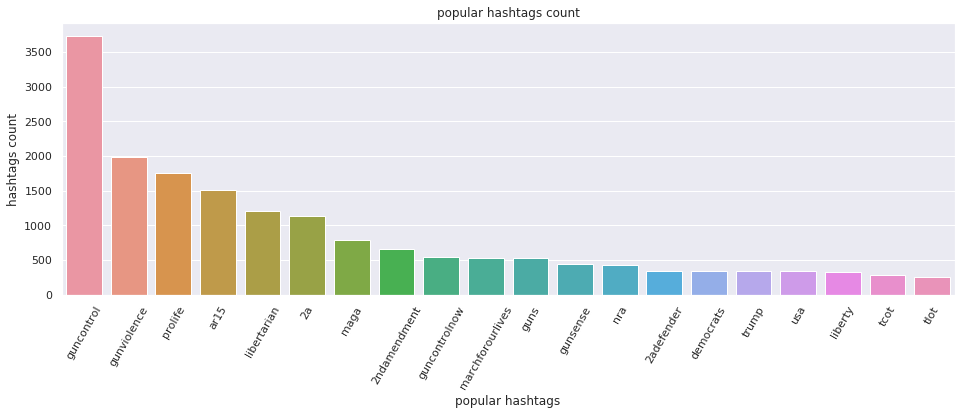

In [215]:
popular_hashtags_list=freq_distribution.most_common(20)
popular_hashtags=[i[0] for i in popular_hashtags_list]
popular_hashtags_count=[i[1] for i in popular_hashtags_list]
f=plt.figure(figsize=(16,5))
plt.title("popular hashtags count")
sns.set(font_scale = 1)
grid=sns.barplot(x=popular_hashtags, y=popular_hashtags_count,orient='v',capsize=20,errwidth=2)
grid.set_xticklabels(labels=popular_hashtags,rotation=60)
plt.ylabel("hashtags count")
plt.xlabel('popular hashtags')
plt.show()

In [217]:
f.savefig('popular_guncontrol_hashtags.jpg', bbox_inches='tight', dpi=400)

In [151]:
shuffled_gunlaw2=pd.read_excel('shuffled_gunlaw.xlsx')

In [34]:
df4=shuffled_gunlaw2.groupby(['date','label'],as_index=False).count().iloc[:,[0,1,2]]

In [35]:
df4.columns=['date','label','count']
df4
#df5

,date,label,count
0,2019-09-19,against,495
1,2019-09-19,for,924
2,2019-09-20,against,607
3,2019-09-20,for,1136
4,2019-09-21,against,363
5,2019-09-21,for,847
6,2019-09-22,against,319
7,2019-09-22,for,731
8,2019-09-23,against,350
9,2019-09-23,for,727


In [194]:
cm = sns.light_palette("seagreen", as_cmap=True)
styled_table = df4.style.background_gradient(cmap=cm)
styled_table

,date,label,count
0,2019-09-19,against,495
1,2019-09-19,for,924
2,2019-09-20,against,607
3,2019-09-20,for,1136
4,2019-09-21,against,363
5,2019-09-21,for,847
6,2019-09-22,against,319
7,2019-09-22,for,731
8,2019-09-23,against,350
9,2019-09-23,for,727


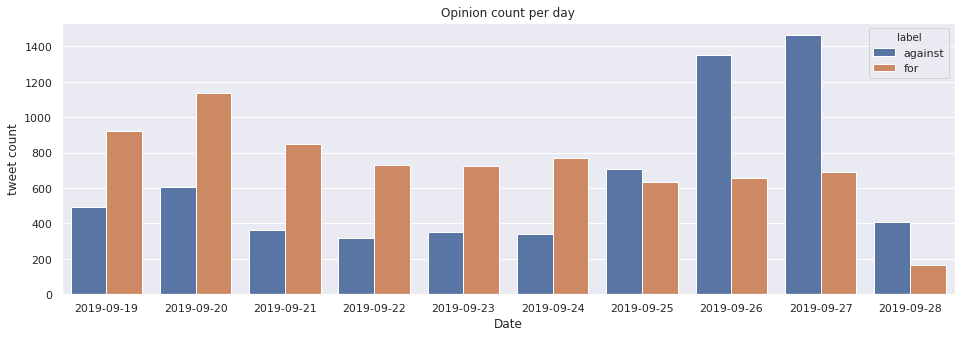

In [219]:
f1=plt.figure(figsize=(16,5))
plt.title("Opinion count per day")
sns.set(font_scale = 1)
grid=sns.barplot(x="date", hue="label", y="count", data=df4)

plt.ylabel("tweet count")
plt.xlabel("Date")
plt.show()

In [220]:
f1.savefig('opinion count per day.jpg', bbox_inches='tight', dpi=400)

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(use_idf=True, min_df=10, max_df=1.0, ngram_range=(2,2),
                        sublinear_tf=True)
x = v.fit_transform(shuffled_gunlaw2['cleaned_text'])
print (len(v.get_feature_names()))

1158


In [189]:
x.shape

(13685, 1158)

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = shuffled_gunlaw2.iloc[:, [4,5,6,7,8,9,10,11,12,13,14]].values
y = shuffled_gunlaw2.iloc[:, [2]].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
labelencoder_x = LabelEncoder()
X[:,4]=labelencoder_x.fit_transform(X[:,4])


onehotencoder_x = OneHotEncoder(categorical_features=[4])
X=onehotencoder_x.fit_transform(X).toarray()

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

/home/tushit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tushit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [146]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,'%')

ValueError: Found input variables with inconsistent numbers of samples: [2737, 300]

In [191]:
df3 =pd.concat([pd.DataFrame(X), pd.DataFrame(x.toarray())], axis=1)

In [175]:
df3

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,0.0,1.0,0.0,0.000,0.000,1.000,0.0000,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.371,0.000,0.629,-0.6486,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.000,0.000,1.000,0.0000,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.149,0.000,0.851,-0.2732,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.000,0.000,1.000,0.0000,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.127,0.099,0.773,-0.1280,5.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.000,0.147,0.853,0.2263,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.000,0.000,1.000,0.0000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.000,0.000,1.000,0.0000,6.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.000,0.381,0.619,0.5106,5.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = df3.iloc[:3000,:].values
y = shuffled_gunlaw2.iloc[:3000,[2]].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
labelencoder_x = LabelEncoder()
X[:,4]=labelencoder_x.fit_transform(X[:,4])


onehotencoder_x = OneHotEncoder(categorical_features=[4])
X=onehotencoder_x.fit_transform(X).toarray()

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/home/tushit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tushit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [193]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,'%')

74.83333333333333 %


In [180]:
pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis=1)

,0,0
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,0,1
9,1,1


In [221]:
shuffled_gunlaw2.head()

,date,text,label,cleaned_text,neg,pos,neu,compound,sentiment,nouns,adj,verb,adp,adv,num,hashtags,mentions
0,2019-09-27,RT @ProLifeBrother Two Clinics Close In Pennsy...,against,RT @ProLifeBrother Clinics Close Pennsylvania ...,0.000,0.0,1.000,0.0000,neutral,5,0,0,0,1,0,#ProLife #ProLifeGen #ChooseLife,@ProLifeBrother @LifeNewsHQ
1,2019-09-19,‘Shame on them for thinking that’ NYPD sergean...,for,‘ Shame thinking ’ NYPD sergeants union head d...,0.371,0.0,0.629,-0.6486,negative,8,1,1,0,0,1,#guncontrol,
2,2019-09-20,RT @wundrellama The Menendez Mag is getting a ...,for,RT @wundrellama Menendez Mag getting tan # cur...,0.000,0.0,1.000,0.0000,neutral,3,0,3,0,0,0,#cure #guncontrol #fosscad #fmda,@wundrellama
3,2019-09-23,RT @chrisoldcorn I Am A Victor Not A Victim | ...,against,RT @chrisoldcorn Victor Victim | Christopher O...,0.149,0.0,0.851,-0.2732,negative,4,1,1,0,0,0,#Patreon #tcot #Conservative #BigGovSucks #Soc...,@chrisoldcorn
4,2019-09-24,@BetoORourke is on the right side of history a...,for,@BetoORourke right history humanity # GunControl,0.000,0.0,1.000,0.0000,neutral,2,1,0,0,0,0,#GunControl,@BetoORourke


In [231]:
import spacy
nlp = spacy.load("en_core_web_sm")
ner={'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0}
PERSON=[]
NORP=[]
FAC=[]
ORG=[]
GPE=[]
LOC=[]
PRODUCT=[]
EVENT=[]
WORK_OF_ART=[]
LAW=[]
LANGUAGE=[]
DATE=[]
TIME=[]
PERCENT=[]
MONEY=[]
QUANTITY=[]
ORDINAL=[]
CARDINAL=[]
for txt in shuffled_gunlaw2['text']:
    ner={'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0}
    doc = nlp(txt)
    for ent in doc.ents:
        ner[ent.label_]=ner[ent.label_]+1
    PERSON.append(ner['PERSON'])
    NORP.append(ner['NORP'])
    FAC.append(ner['FAC'])
    ORG.append(ner['ORG'])
    GPE.append(ner['GPE'])
    LOC.append(ner['LOC'])
    PRODUCT.append(ner['PRODUCT'])
    EVENT.append(ner['EVENT'])
    WORK_OF_ART.append(ner['WORK_OF_ART'])
    LAW.append(ner['LAW'])
    LANGUAGE.append(ner['LANGUAGE'])
    DATE.append(ner['DATE'])
    TIME.append(ner['TIME'])
    PERCENT.append(ner['PERCENT'])
    MONEY.append(ner['MONEY'])
    QUANTITY.append(ner['QUANTITY'])
    ORDINAL.append(ner['ORDINAL'])
    CARDINAL.append(ner['CARDINAL'])
    
    

In [233]:
shuffled_gunlaw2['PERSON']=PERSON
shuffled_gunlaw2['NORP']=NORP
shuffled_gunlaw2['FAC']=FAC
shuffled_gunlaw2['ORG']=ORG
shuffled_gunlaw2['GPE']=GPE
shuffled_gunlaw2['LOC']=LOC
shuffled_gunlaw2['PRODUCT']=PRODUCT
shuffled_gunlaw2['EVENT']=EVENT
shuffled_gunlaw2['WORK_OF_ART']=WORK_OF_ART
shuffled_gunlaw2['LAW']=LAW
shuffled_gunlaw2['LANGUAGE']=LANGUAGE
shuffled_gunlaw2['DATE']=DATE
shuffled_gunlaw2['TIME']=TIME
shuffled_gunlaw2['PERCENT']=PERCENT
shuffled_gunlaw2['MONEY']=MONEY
shuffled_gunlaw2['QUANTITY']=QUANTITY
shuffled_gunlaw2['ORDINAL']=ORDINAL
shuffled_gunlaw2['CARDINAL']=CARDINAL


In [235]:
shuffled_gunlaw2.head().T

,0,1,2,3,4
date,2019-09-27,2019-09-19,2019-09-20,2019-09-23,2019-09-24
text,RT @ProLifeBrother Two Clinics Close In Pennsy...,‘Shame on them for thinking that’ NYPD sergean...,RT @wundrellama The Menendez Mag is getting a ...,RT @chrisoldcorn I Am A Victor Not A Victim | ...,@BetoORourke is on the right side of history a...
label,against,for,for,against,for
cleaned_text,RT @ProLifeBrother Clinics Close Pennsylvania ...,‘ Shame thinking ’ NYPD sergeants union head d...,RT @wundrellama Menendez Mag getting tan # cur...,RT @chrisoldcorn Victor Victim | Christopher O...,@BetoORourke right history humanity # GunControl
neg,0,0.371,0,0.149,0
pos,0,0,0,0,0
neu,1,0.629,1,0.851,1
compound,0,-0.6486,0,-0.2732,0
sentiment,neutral,negative,neutral,negative,neutral
nouns,5,8,3,4,2
